In [1]:
import pandas as pd
df = pd.read_csv('data.csv', names=['time', 'low', 'high', 'open', 'close', 'volume', 'tw_sentiment', 'tw_followers', 'reddit_sentiment'])
df.head()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
0,1519997640,10969.0,10969.01,10969.01,10969.00,0.111542,0.195409,607130.0,0.113258
1,1519997700,10969.0,10969.00,10969.00,10969.00,0.504804,0.195409,607131.0,0.113258
2,1519997760,10965.0,10965.01,10965.00,10965.01,0.622844,0.195409,607135.0,0.113258
3,1519997820,10965.0,10965.00,10965.00,10965.00,0.036500,0.195408,607140.0,0.113258
4,1519997880,10964.8,10964.81,10964.81,10964.80,0.762078,0.195451,607349.0,0.113258


In [2]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
count,1.900000e+01,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,1.900000e+01
mean,1.519998e+09,10970.430000,10970.856316,10970.433158,10970.854211,0.599452,0.134100,515153.578947,1.132576e-01
std,3.376389e+02,3.609743,3.529179,3.610414,3.529657,0.584171,0.037655,56603.262183,6.542052e-18
min,1.519998e+09,10964.800000,10964.810000,10964.800000,10964.800000,0.036500,0.111523,479000.000000,1.132576e-01
25%,1.519998e+09,10967.500000,10969.005000,10967.500000,10969.000000,0.189449,0.111524,479012.000000,1.132576e-01
50%,1.519998e+09,10973.010000,10973.280000,10973.010000,10973.280000,0.504804,0.112712,485620.000000,1.132576e-01
75%,1.519998e+09,10973.280000,10973.290000,10973.290000,10973.290000,0.696562,0.154453,547416.000000,1.132576e-01
max,1.519999e+09,10973.290000,10974.000000,10973.290000,10974.000000,2.422113,0.195451,607349.000000,1.132576e-01


In [3]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
time,1.000000,0.772515,0.722817,0.772317,0.722915,-0.093764,-0.772618,-0.792684,-0.335083
low,0.772515,1.000000,0.868233,0.999999,0.868174,-0.374539,-0.662188,-0.674821,-0.093373
high,0.722817,0.868233,1.000000,0.868152,0.999999,-0.179080,-0.748706,-0.755803,-0.123977
open,0.772317,0.999999,0.868152,1.000000,0.868092,-0.374586,-0.661925,-0.674565,-0.093562
close,0.722915,0.868174,0.999999,0.868092,1.000000,-0.178919,-0.748937,-0.756036,-0.123820
volume,-0.093764,-0.374539,-0.179080,-0.374586,-0.178919,1.000000,-0.200683,-0.193804,-0.038189
tw_sentiment,-0.772618,-0.662188,-0.748706,-0.661925,-0.748937,-0.200683,1.000000,0.999161,0.383763
tw_followers,-0.792684,-0.674821,-0.755803,-0.674565,-0.756036,-0.193804,0.999161,1.000000,0.383004
reddit_sentiment,-0.335083,-0.093373,-0.123977,-0.093562,-0.123820,-0.038189,0.383763,0.383004,1.000000


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


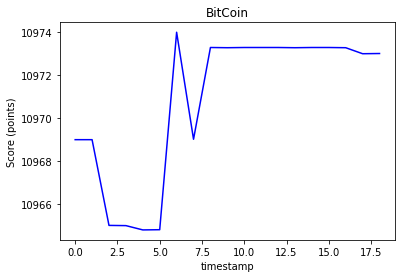

In [4]:
import matplotlib.pyplot as plt
plt.title("BitCoin")
plt.xlabel("timestamp")
plt.ylabel("Score (points)")
plt.plot(df['close'], 'b')
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [11]:
numpy.random.seed(42)

In [12]:
dataset = df['close'].values.reshape(-1, 1)
dataset = dataset.astype('float32')

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [14]:
from sklearn.model_selection import train_test_split
X = np.arange(len(dataset)).reshape(-1, 1)
y = np.array(dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout

X_train = numpy.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = numpy.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [16]:
numpy.random.seed(42)

model = Sequential()

model.add(LSTM(400, input_shape=(None, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(400, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, batch_size=280, epochs=25, validation_data=(X_test, y_test))

Train on 15 samples, validate on 4 samples
Epoch 1/25
15/15 [==============================] - 2s 121ms/step - loss: 0.4953 - val_loss: 0.3352
Epoch 2/25
15/15 [==============================] - 0s 2ms/step - loss: 0.3136 - val_loss: 0.0754
Epoch 3/25
15/15 [==============================] - 0s 3ms/step - loss: 0.1688 - val_loss: 0.0061
Epoch 4/25
15/15 [==============================] - 0s 3ms/step - loss: 0.0929 - val_loss: 0.1384
Epoch 5/25
15/15 [==============================] - 0s 4ms/step - loss: 0.0722 - val_loss: 0.4152
Epoch 6/25
15/15 [==============================] - 0s 3ms/step - loss: 0.1027 - val_loss: 0.6291
Epoch 7/25
15/15 [==============================] - 0s 3ms/step - loss: 0.1361 - val_loss: 0.6858
Epoch 8/25
15/15 [==============================] - 0s 3ms/step - loss: 0.1514 - val_loss: 0.6055
Epoch 9/25
15/15 [==============================] - 0s 3ms/step - loss: 0.1401 - val_loss: 0.4594
Epoch 10/25
15/15 [==============================] - 0s 3ms/step - loss: 

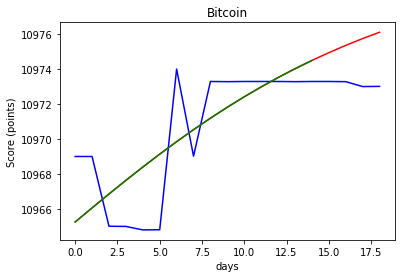

In [18]:
X = numpy.reshape(X, (X.shape[0], X.shape[1], 1))
y_predict_train = model.predict(X_train)
y_predict_train = scaler.inverse_transform(y_predict_train)
y_predict = model.predict(X)
y_predict = scaler.inverse_transform(y_predict)
plt.title("Bitcoin")
plt.xlabel("days")
plt.ylabel("Score (points)")
plt.plot(df['close'], 'b')
plt.plot(y_predict, 'r')
plt.plot(y_predict_train, 'g')
plt.show()